# __Analysis of Suicide Rates in different countries__

In [10]:
#importing the relevant libraries for data analytics and visualization
import numpy as np                                      #importing numpy
import pandas as pd                                     #importing pandas
import matplotlib.pyplot as plt                         #importing matplotlib
import seaborn as sns                                   #importing seaborn

#Reading the csv file into a pandas dataframe
df=pd.read_csv("suicide_rates.csv")
n_df=df.copy()              #creating a copy of the original dataframe so that data is retained even if some changes are made to the original dataframe
display(df.head(10))
shape=df.shape              #getting the number of rows and columns in the dataframe
print("The number of columns in the dataframe is {}".format(shape[1]))
print("The number of rows in the dataframe is {}".format(shape[0]))
#finding the number of NaN (Not a number) values in the dataframe
NaN=df.isna().sum()
print("Number of NaN values in each column -->")
print(NaN)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


The number of columns in the dataframe is 12
The number of rows in the dataframe is 27820
Number of NaN values in each column -->
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [11]:
#printing the data types of the columns of the dataframe
print(df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


# Converting the commas in the column "GDP for year ($)" to convert the values to integer

In [12]:
#We need to convert the commas in the column "gdp_for _year ($)" into null space to convert the string into an integer because as such, it throws an error 'unable to parse string'
my_list=[]                      #creating an empty list to store the numbers after removing the commas
for values in df.iloc[:,9]:
    num_string=""
    for char in values:
        if(char!=","):
            num_string=num_string+char
        else:
            continue
    my_list.append(num_string)
pandas_series=pd.Series(my_list)     #creating a pandas series from the list
df.iloc[:,9]=pandas_series           #replacing that concerned column with this series
df.iloc[:,9]=pd.to_numeric(df.iloc[:,9])
display(df.dtypes)
display(df.head(10))
print("\n")
#We also need to remove 'years' from the age column
df.iloc[:,3]=df.iloc[:,3].str.replace("years","")    #replacing years with an wmoty string
display(df.head())
copy_df=df.copy()

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


Printing the number of unique values in each column

In [13]:
#printing the number of unique values in each column of the matrix
for column in df.columns.values:
    print(f"{column} has {len(pd.unique(df[column]))} unique values")

country has 101 unique values
year has 32 unique values
sex has 2 unique values
age has 6 unique values
suicides_no has 2084 unique values
population has 25564 unique values
suicides/100k pop has 5298 unique values
country-year has 2321 unique values
HDI for year has 306 unique values
 gdp_for_year ($)  has 2321 unique values
gdp_per_capita ($) has 2233 unique values
generation has 6 unique values


In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


None

Finding the mode of each of the discrete variables (country, age, generation, number of suicides, sex, year)

In [15]:
#finding the mode value for the discrete columns'
my_arr=df.iloc[:,4].unique()     #getting the number of unique values in the column 'number of suicides'
print(len(my_arr))
#the column has 2321 unqiue values
#printing the mode of each of the discrete variables
print(f"The mode for column '{df.columns[4]}' is{df.iloc[:,4].mode()}")
print(f"The mode for column 'Country' is{df['country'].mode()}")
print(f"The mode for column 'Year' is{df['year'].mode()}")
print(f"The mode for column 'Sex' is{df['sex'].mode()}")
print(f"The mode for column 'Age' is{df['age'].mode()}")
print(f"The mode for column 'Generation' is{df['generation'].mode()}")

2084
The mode for column 'suicides_no' is0    0
Name: suicides_no, dtype: int64
The mode for column 'Country' is0        Austria
1        Iceland
2      Mauritius
3    Netherlands
Name: country, dtype: object
The mode for column 'Year' is0    2009
Name: year, dtype: int64
The mode for column 'Sex' is0    female
1      male
Name: sex, dtype: object
The mode for column 'Age' is0    15-24 
1    25-34 
2    35-54 
3    55-74 
4      75+ 
Name: age, dtype: object
The mode for column 'Generation' is0    Generation X
Name: generation, dtype: object


1. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

In [17]:
#Continuous Variables
#population, suicides/100k, gdp_for_year($), gdp_per_capita($), HDI
#1. Printing the mean of the continuous variables
new_df=df.iloc[:,0:11]                                      #creating a copy of the original dataframe
new_df.drop(df.columns[0:5],axis=1,inplace=True)            #dropping the starting 4 columns (discrete varibales)
display(new_df.head(10))
new_df.drop(new_df.columns[2],axis=1,inplace=True)          #dropping the remaining discrete variables
display(new_df.head(10))

,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,Albania1987,NaN,2156624900,796
1,308000,5.19,Albania1987,NaN,2156624900,796
2,289700,4.83,Albania1987,NaN,2156624900,796
3,21800,4.59,Albania1987,NaN,2156624900,796
4,274300,3.28,Albania1987,NaN,2156624900,796
5,35600,2.81,Albania1987,NaN,2156624900,796
6,278800,2.15,Albania1987,NaN,2156624900,796
7,257200,1.56,Albania1987,NaN,2156624900,796
8,137500,0.73,Albania1987,NaN,2156624900,796
9,311000,0.00,Albania1987,NaN,2156624900,796


,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,NaN,2156624900,796
1,308000,5.19,NaN,2156624900,796
2,289700,4.83,NaN,2156624900,796
3,21800,4.59,NaN,2156624900,796
4,274300,3.28,NaN,2156624900,796
5,35600,2.81,NaN,2156624900,796
6,278800,2.15,NaN,2156624900,796
7,257200,1.56,NaN,2156624900,796
8,137500,0.73,NaN,2156624900,796
9,311000,0.00,NaN,2156624900,796


In [18]:
info_df=pd.DataFrame(columns=new_df.columns)
#creating a dataframe in which the columns are the continuous variables and the rows are mean, max, min, variance, standard deviation, median, percentile, inter quartile range
info_df.loc[0]=[new_df.iloc[:,0].mean(),new_df.iloc[:,1].mean(),new_df.iloc[:,2].dropna().mean(),new_df.iloc[:,3].mean(),new_df.iloc[:,4].dropna().mean()]
info_df.loc[1]=[new_df.iloc[:,0].max(),new_df.iloc[:,1].max(),new_df.iloc[:,2].dropna().max(),new_df.iloc[:,3].max(),new_df.iloc[:,4].max()]
info_df.loc[2]=[new_df.iloc[:,0].min(),new_df.iloc[:,1].min(),new_df.iloc[:,2].dropna().min(),new_df.iloc[:,3].min(),new_df.iloc[:,4].min()]
info_df.loc[3]=[new_df.iloc[:,0].var(),new_df.iloc[:,1].var(),new_df.iloc[:,2].dropna().var(),new_df.iloc[:,3].var(),new_df.iloc[:,4].var()]
info_df.loc[4]=[new_df.iloc[:,0].std(),new_df.iloc[:,1].std(),new_df.iloc[:,2].dropna().std(),new_df.iloc[:,3].std(),new_df.iloc[:,4].std()]
info_df.loc[5]=[new_df.iloc[:,0].median(),new_df.iloc[:,1].median(),new_df.iloc[:,2].dropna().median(),new_df.iloc[:,3].median(),new_df.iloc[:,4].median()]
info_df.loc[6]=[new_df.iloc[:,0].quantile(0.25),new_df.iloc[:,1].quantile(0.25),new_df.iloc[:,2].dropna().quantile(0.25),new_df.iloc[:,3].quantile(0.25),new_df.iloc[:,4].quantile(0.25)]
info_df.loc[7]=[new_df.iloc[:,0].quantile(0.75),new_df.iloc[:,1].quantile(0.75),new_df.iloc[:,2].dropna().quantile(0.75),new_df.iloc[:,3].quantile(0.75),new_df.iloc[:,4].quantile(0.75)]
info_df.loc[8]=info_df.loc[7]-info_df.loc[6]
#adding the index names
info_df.index=["Mean","Maximum","Minimum","Variance","Standard Deviation","Median","25th percentile","75th percentile","Inter Quartile Range"]
display(info_df)

,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
Mean,1.844794e+06,12.816097,0.776601,4.455810e+11,1.686646e+04
Maximum,4.380521e+07,224.970000,0.944000,1.812071e+13,1.263520e+05
Minimum,2.780000e+02,0.000000,0.483000,4.691962e+07,2.510000e+02
Variance,1.530202e+13,359.538900,0.008717,2.112982e+24,3.567405e+08
Standard Deviation,3.911779e+06,18.961511,0.093367,1.453610e+12,1.888758e+04
Median,4.301500e+05,5.990000,0.779000,4.811469e+10,9.372000e+03
25th percentile,9.749850e+04,0.920000,0.713000,8.985353e+09,3.447000e+03
75th percentile,1.486143e+06,16.620000,0.855000,2.602024e+11,2.487400e+04
Inter Quartile Range,1.388645e+06,15.700000,0.142000,2.512171e+11,2.142700e+04


2. For each variable, plot box and whiskers plot

,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,NaN,2156624900,796
1,308000,5.19,NaN,2156624900,796
2,289700,4.83,NaN,2156624900,796
3,21800,4.59,NaN,2156624900,796
4,274300,3.28,NaN,2156624900,796


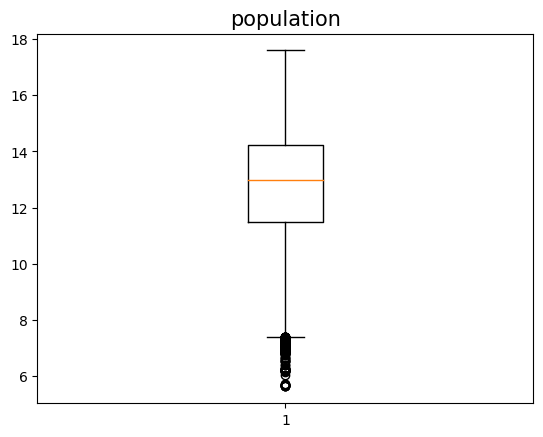

C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


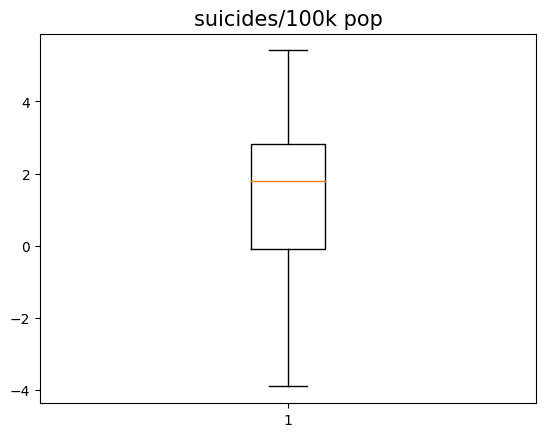

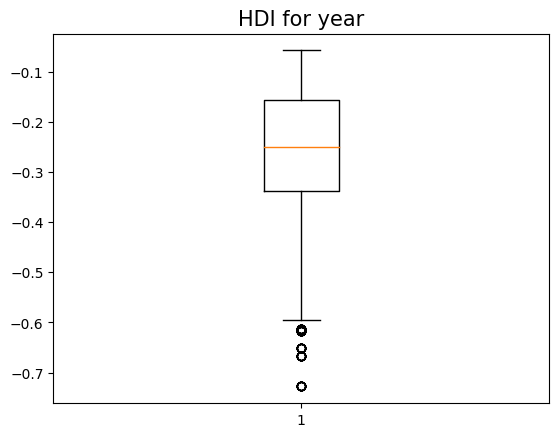

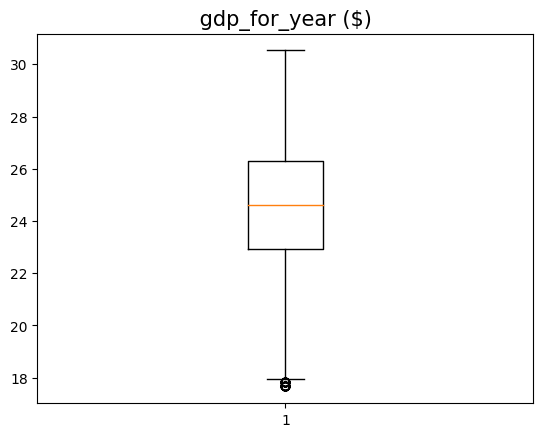

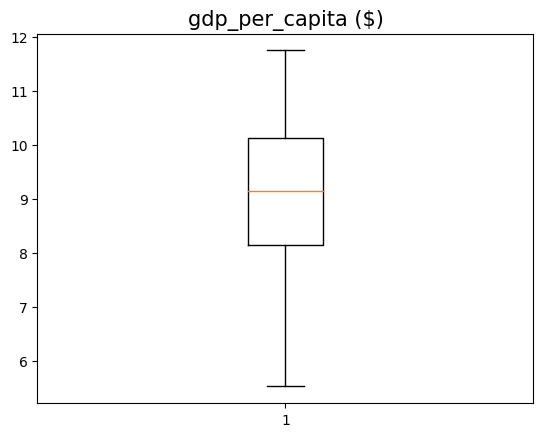

In [19]:
#Box and Whiskers plot for continuous variables
display(new_df.head())
# potting the box and whisker plot for population and suicides per 100k population
for index in range(0,2):
    plt.boxplot(np.log(new_df.iloc[:,index]))                        #box and whisker plot
    plt.title(new_df.columns[index],fontsize=15)
    plt.xticks(fontsize=10)           #changing the font size
    plt.yticks(fontsize=10)           #changing the font size
    plt.show()
#plotting box and whiskers plot for HDI
plt.boxplot(np.log(new_df.iloc[:,2].dropna()))                        #box and whisker plot
plt.title(new_df.columns[2],fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#plotting the box and whiskers plot for gdp for year and gpd per capita
for index in range(3,5):
    plt.boxplot(np.log(new_df.iloc[:,index]))                        #box and whisker plot
    plt.title(new_df.columns[index],fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


3. PLot histogram for these variables with
    1. too few bins
    2. too many bins
    3. moderate number of bins

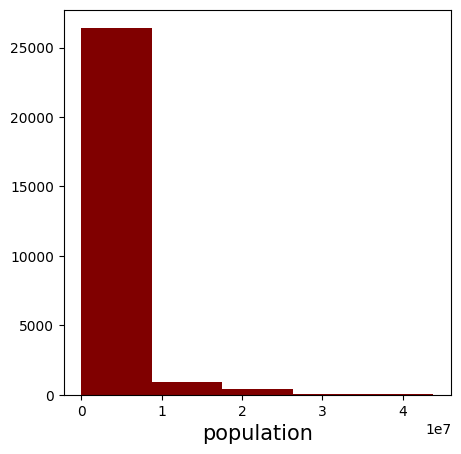

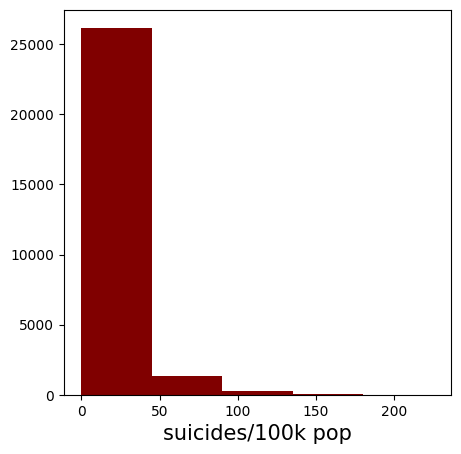

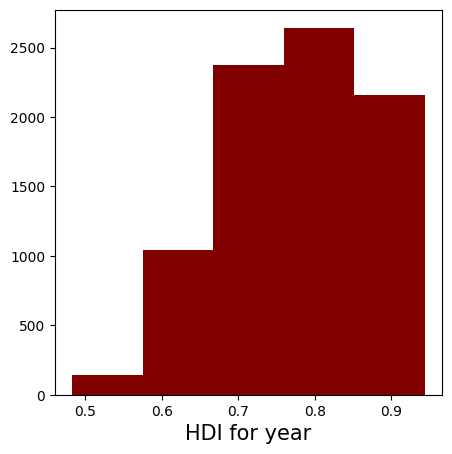

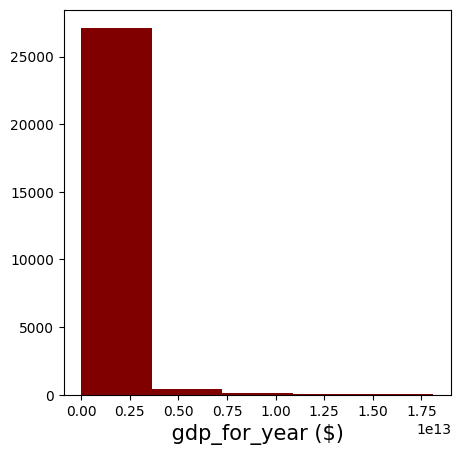

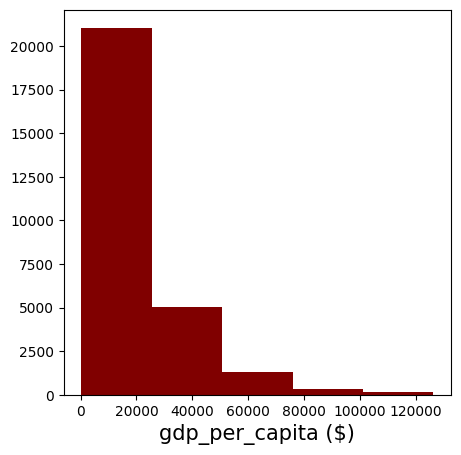

In [20]:
#Plotting the histogram with too few bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
     plt.figure(figsize=(5,5))   #specifying the figure size
     plt.hist(new_df[column],5,color="maroon")    #using the appropriate number if bins
     plt.xlabel(column,fontsize=15)                         #specifying the xlabel
     plt.xticks(fontsize=10)
     plt.yticks(fontsize=10)
     plt.show()

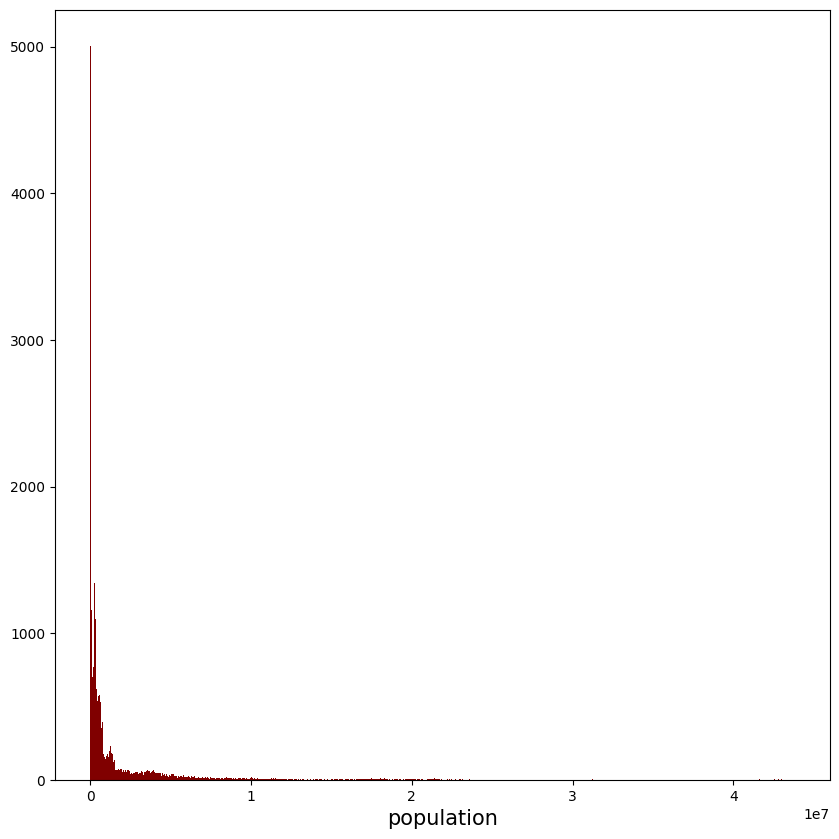

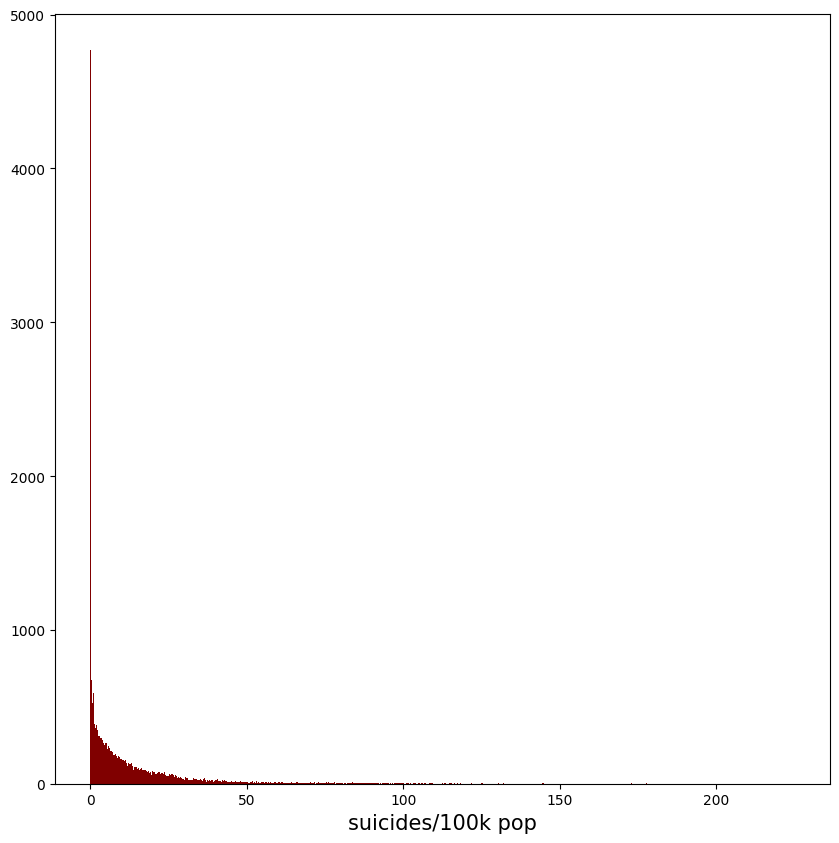

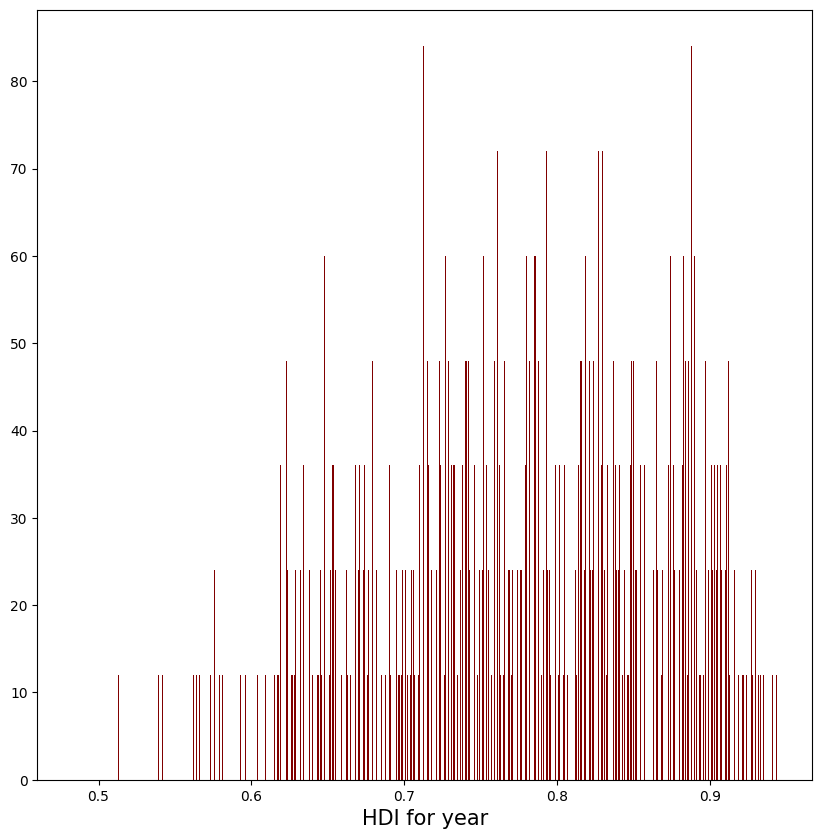

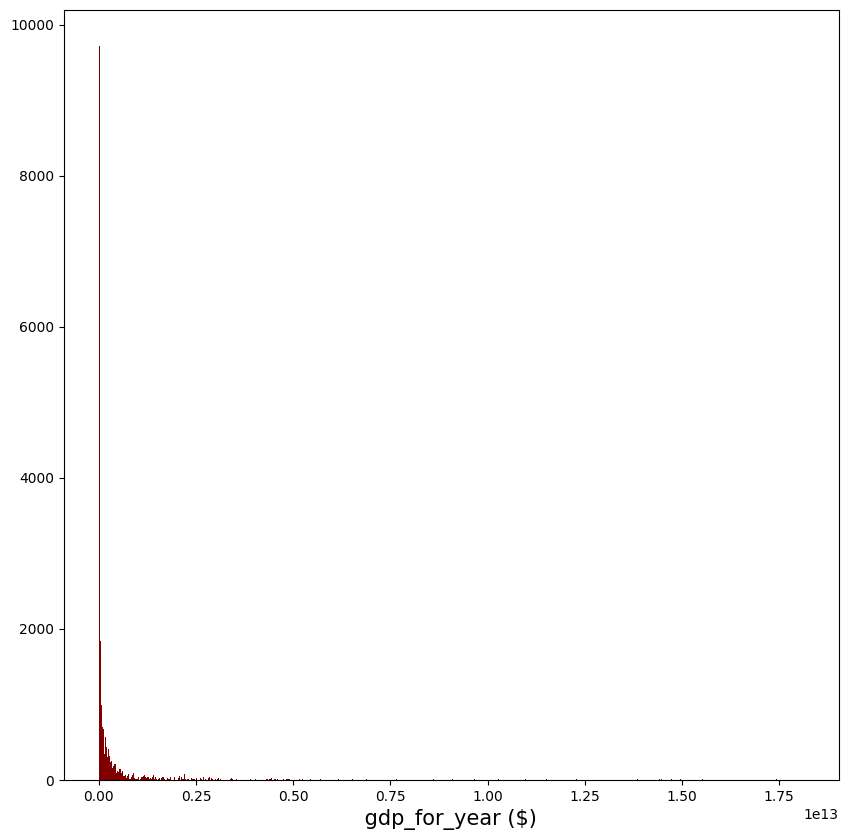

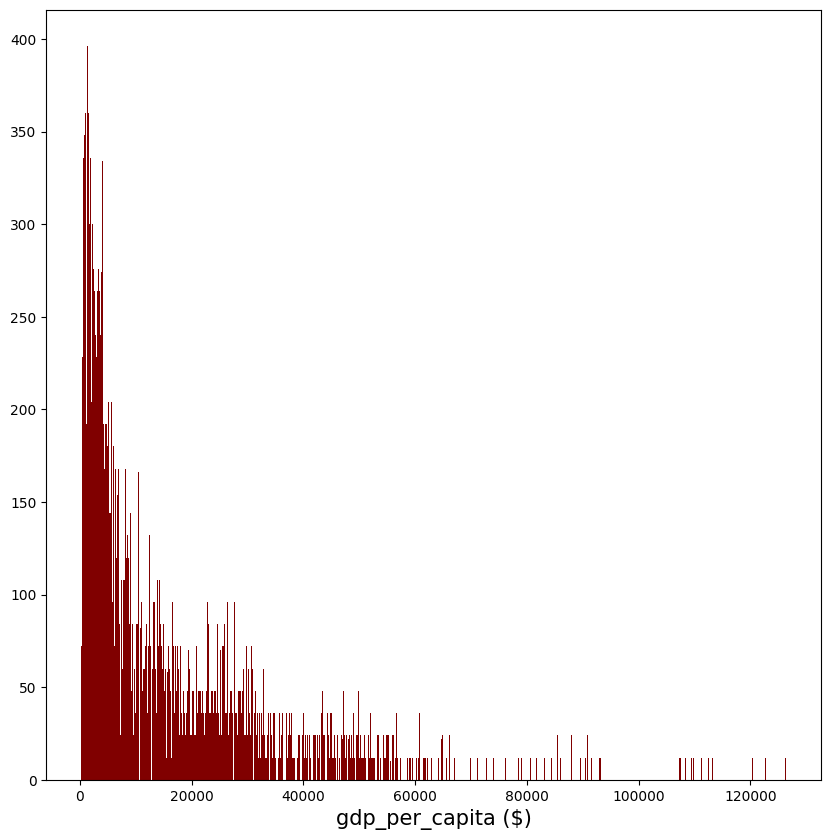

In [21]:
#plotting the histograms with too many bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
    plt.figure(figsize=(10,10))
    plt.hist(new_df[column],1000,color="maroon")    #using the appropriate number if bins
    plt.xlabel(column,fontsize=15)                         
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

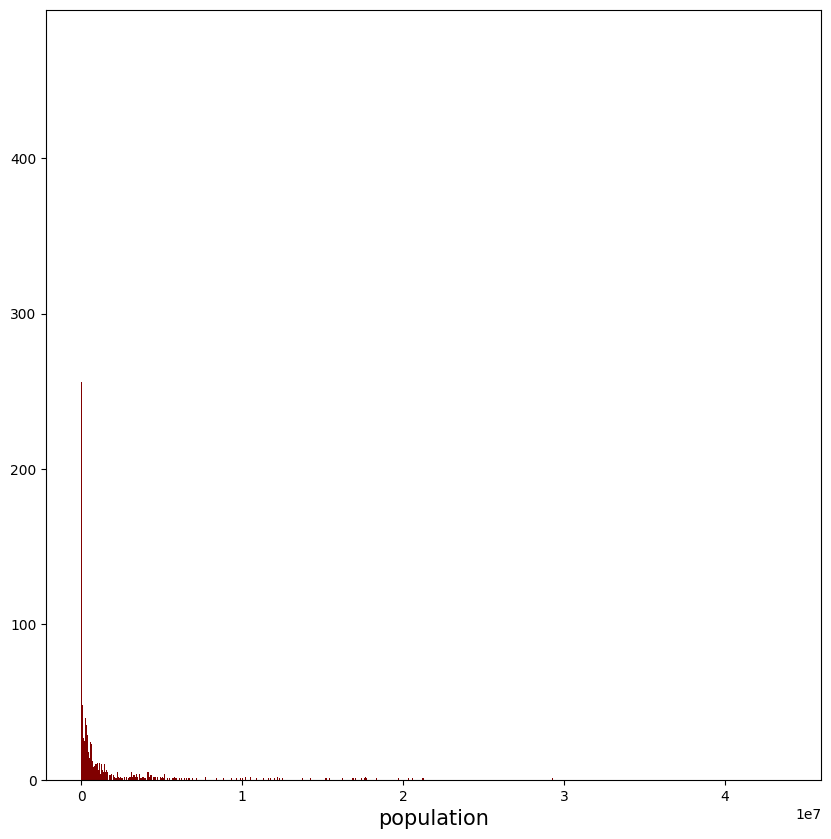

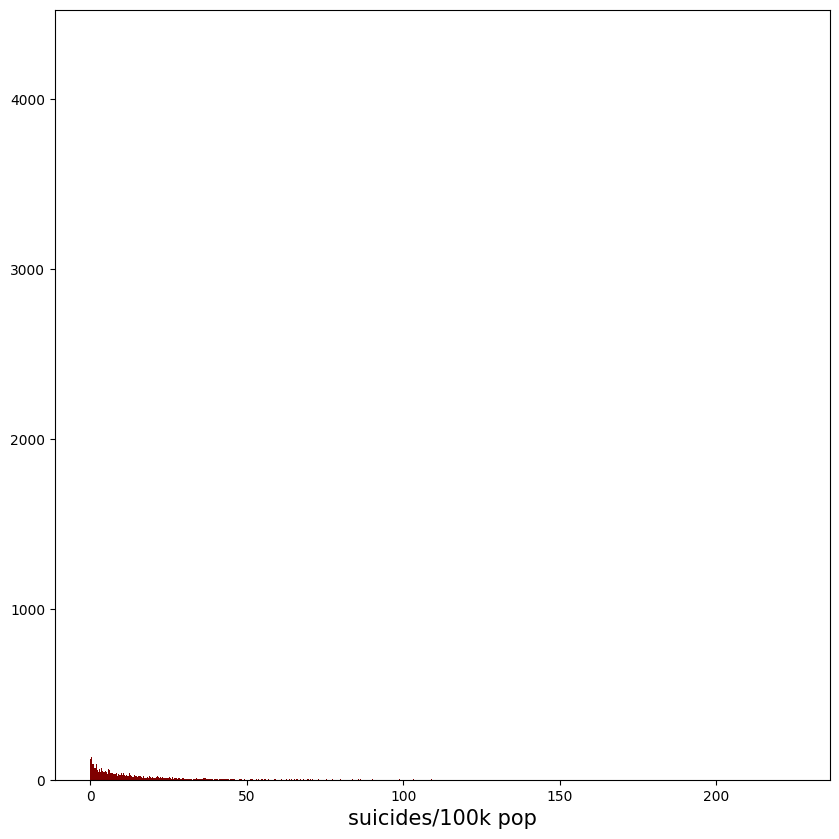

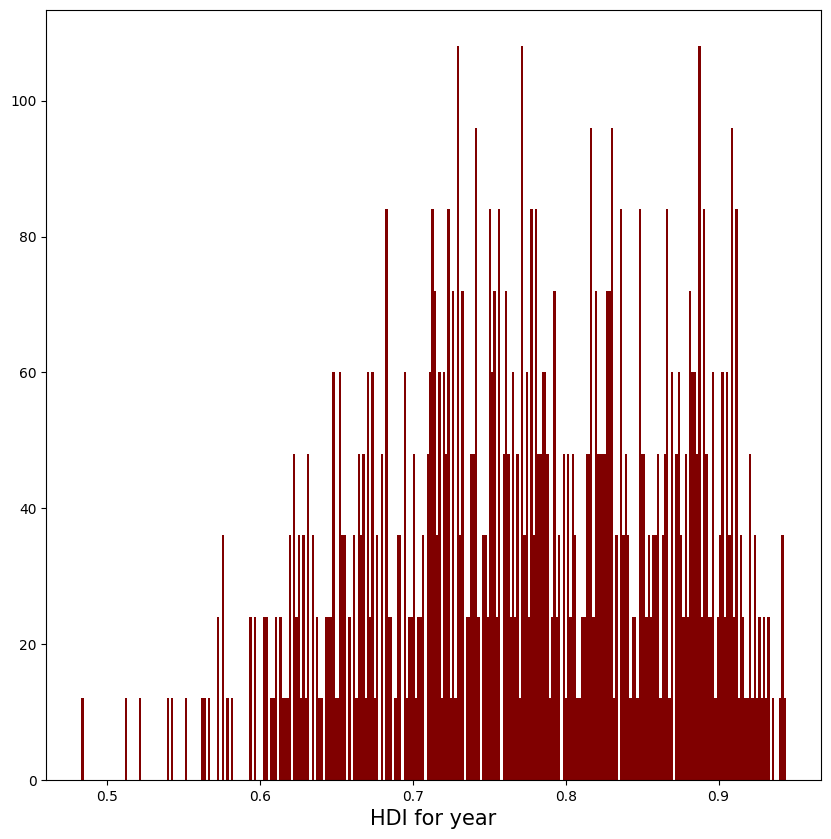

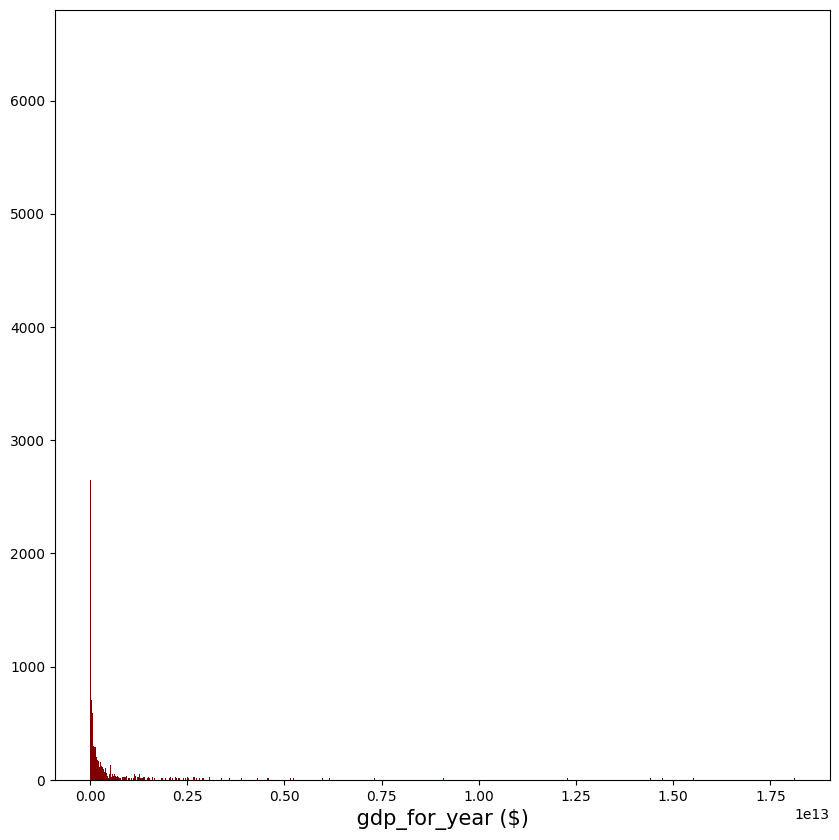

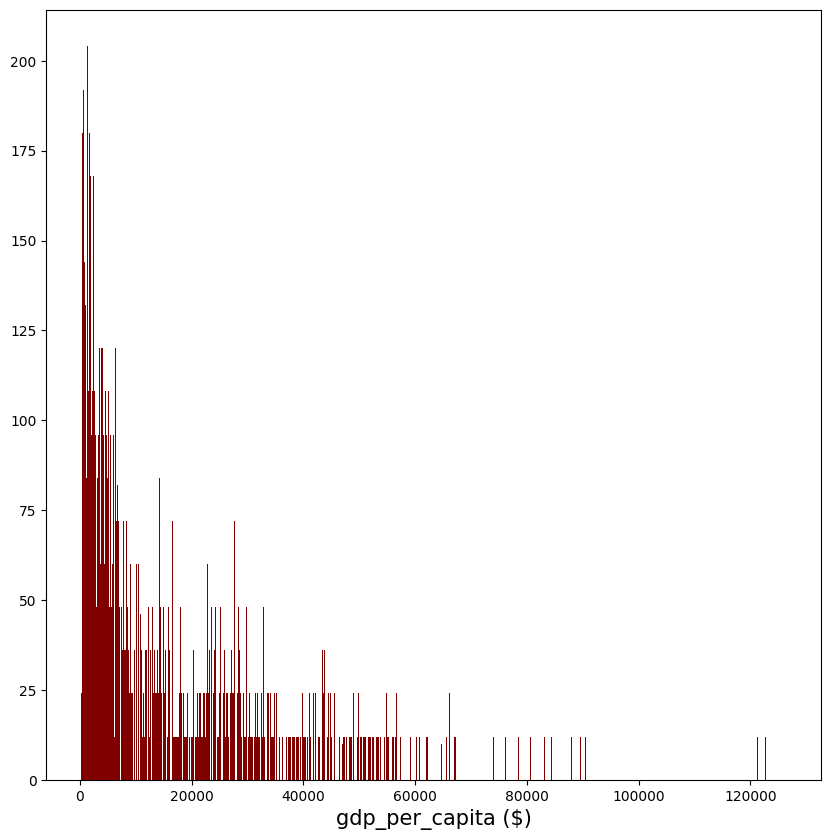

In [22]:
#plotting the histogram with moderate number of bins
for column in new_df.columns.values:                               #using a for loop to iterate through the columns
    plt.figure(figsize=(10,10))
    plt.hist(new_df[column],75 if len(pd.unique(new_df[column]))<100 else len(pd.unique(new_df[column])),color="maroon")    #using the appropriate number of bins
    plt.xlabel(column,fontsize=15)                         
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

2. Plot a heatmap of correlation between all pairs of continuous variables

,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,312900,6.71,NaN,2156624900,796
1,308000,5.19,NaN,2156624900,796
2,289700,4.83,NaN,2156624900,796
3,21800,4.59,NaN,2156624900,796
4,274300,3.28,NaN,2156624900,796
...,...,...,...,...,...
27815,3620833,2.96,0.675,63067077179,2309
27816,348465,2.58,0.675,63067077179,2309
27817,2762158,2.17,0.675,63067077179,2309
27818,2631600,1.67,0.675,63067077179,2309


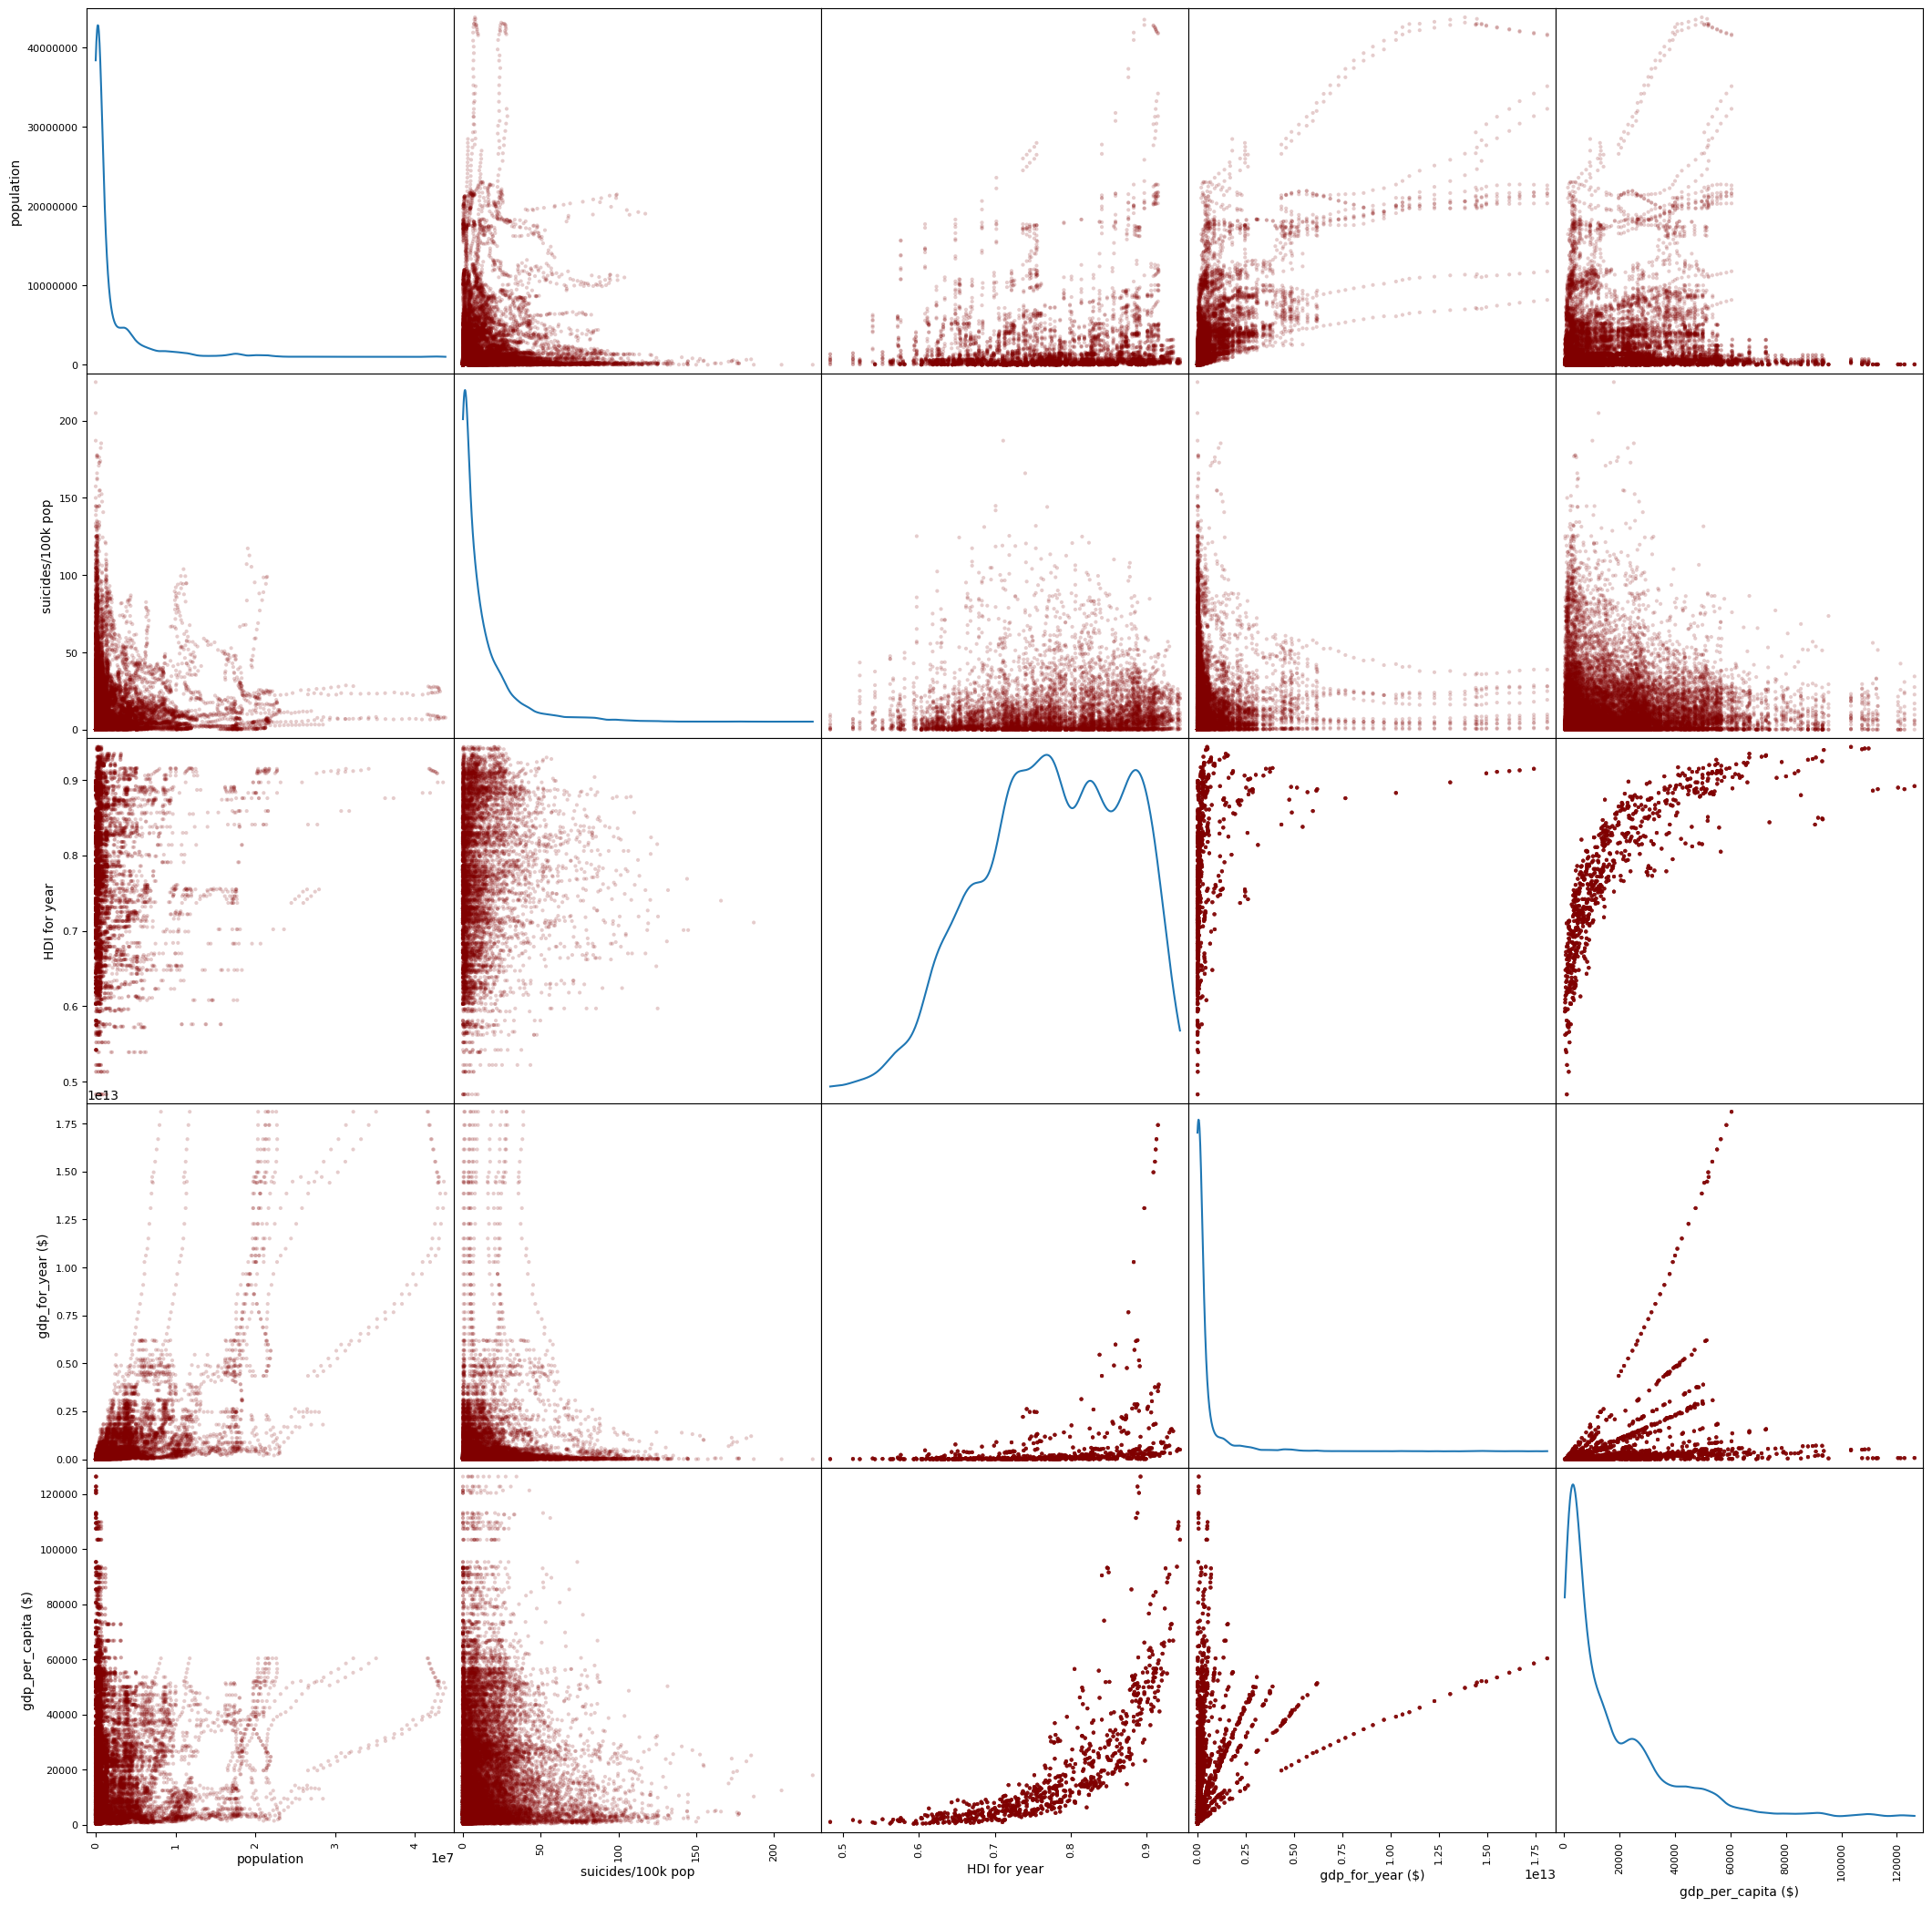

In [23]:
display(new_df)
# plotting a scatter matrix as a part of EDA (1.A)
from pandas.plotting import scatter_matrix
scatter_matrix(new_df, alpha=0.2, figsize=(26, 26), diagonal='kde',color="maroon")
plt.show()

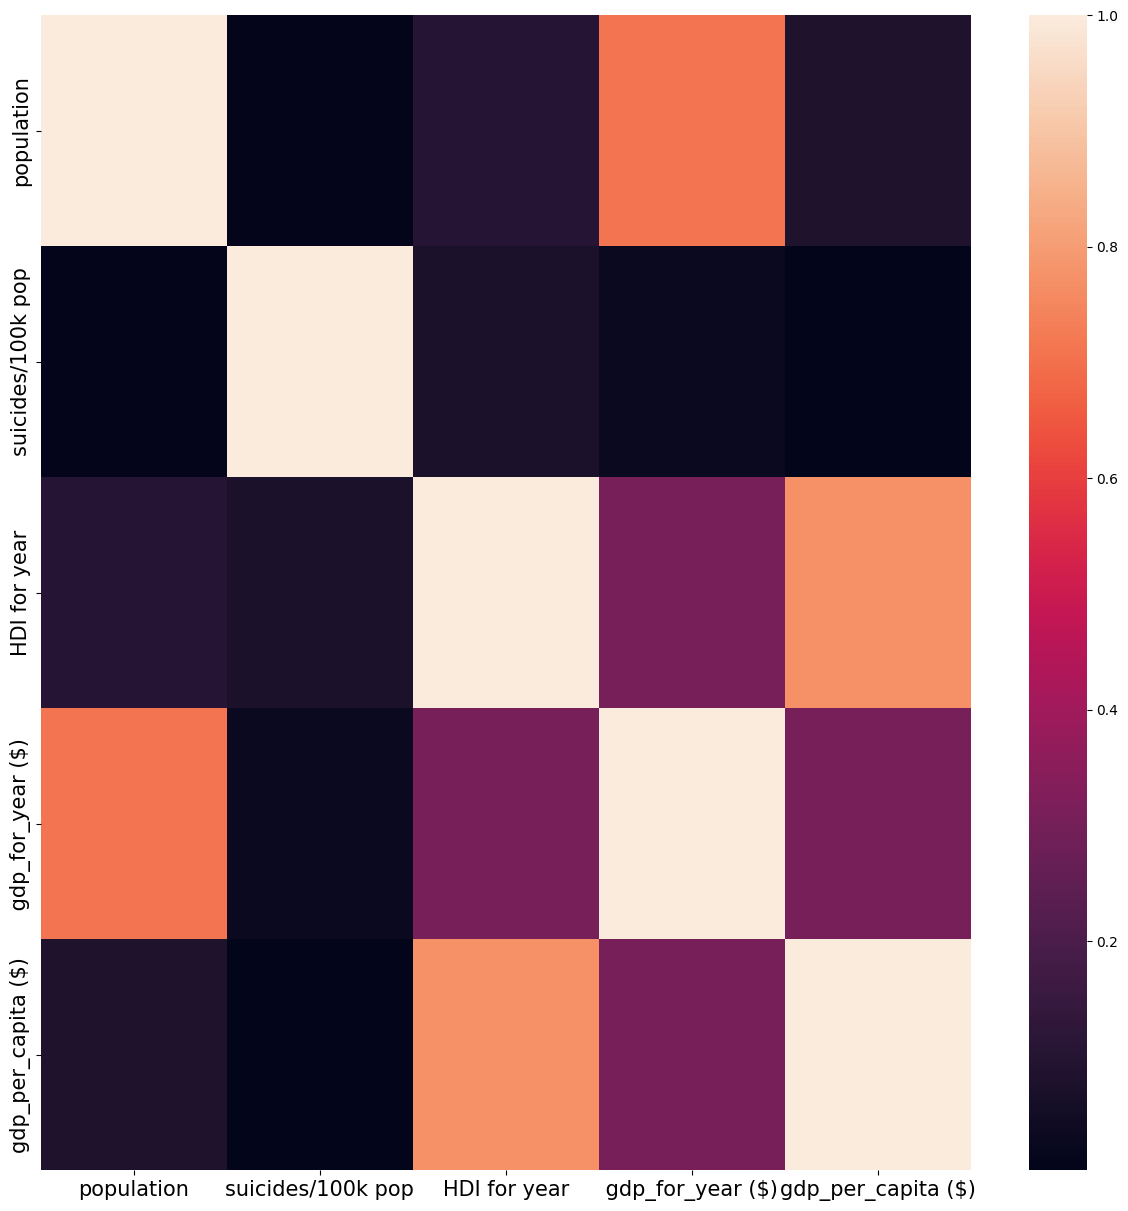

In [24]:
#Plotting the color-coded correlation matrix (heatmap)
corrMatrix = new_df.corr(method='pearson') # Use spearman for non-linear
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(abs(corrMatrix), annot=False) # Show absolute value
plt.xticks(fontsize=15)                   #setting the fontsize of the xticks
plt.yticks(fontsize=15)                   #setting the fontsize of the yticks
plt.show()

In [25]:
#converting year to datetime using .astype
print(pd.unique(df["age"]))
df["age"].str.replace(" years","")
df['age'].replace('5-14','05-14', regex=True, inplace=True)
df["year"]=df["year"].astype(np.int64)
print(df["age"])

['15-24 ' '35-54 ' '75+ ' '25-34 ' '55-74 ' '5-14 ']
0        15-24 
1        35-54 
2        15-24 
3          75+ 
4        25-34 
          ...  
27815    35-54 
27816      75+ 
27817    05-14 
27818    05-14 
27819    55-74 
Name: age, Length: 27820, dtype: object


1. Pick the top six countries by average yearly suicides, and display their suicide for each year
separately

In [26]:
copy_df["age"].str.replace(" years","")                             #replacing the 'years' by an empty string
copy_df['age'].replace('5-14','05-14', regex=True, inplace=True)
copy_df["year"]=copy_df["year"].astype(np.int64)                    #converting the year column to int datatype
temp_df=copy_df.groupby(["country","year"]).sum()                   #grouping by country and year
display(temp_df.head())
alt_df=copy_df.groupby(["country"]).mean()                          #grouping by country and taking the mean. Also, year acts as index
display(alt_df["suicides_no"].head())
id_list=alt_df.nlargest(6,"suicides_no").index.tolist()             #creating a list which contains the names of the countries with the maximum average number of suicides
print(id_list)
#thus, we have found the top 6 countries by average number of suicides4
#They are, Russia, United States, Japan, Ukraine, Germany, France

suicides_no  population  suicides/100k pop  HDI for year  \
country year                                                             
Albania 1987           73     2709600              31.85           0.0   
        1988           63     2764300              32.46           0.0   
        1989           68     2803100              33.40           0.0   
        1992           47     2822500              18.00           0.0   
        1993           73     2807300              32.56           0.0   

               gdp_for_year ($)   gdp_per_capita ($)  
country year                                          
Albania 1987         25879498800                9552  
        1988         25512000000                9228  
        1989         28021499856                9996  
        1992          8513431008                3012  
        1993         14736852456                5244

country
Albania                  7.462121
Antigua and Barbuda      0.033951
Argentina              221.018817
Armenia                  6.392617
Aruba                    0.601190
Name: suicides_no, dtype: float64

['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany', 'France']


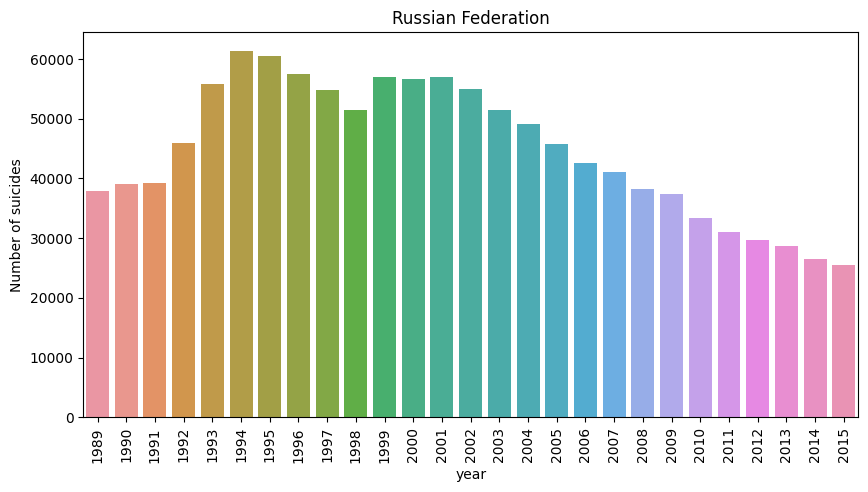

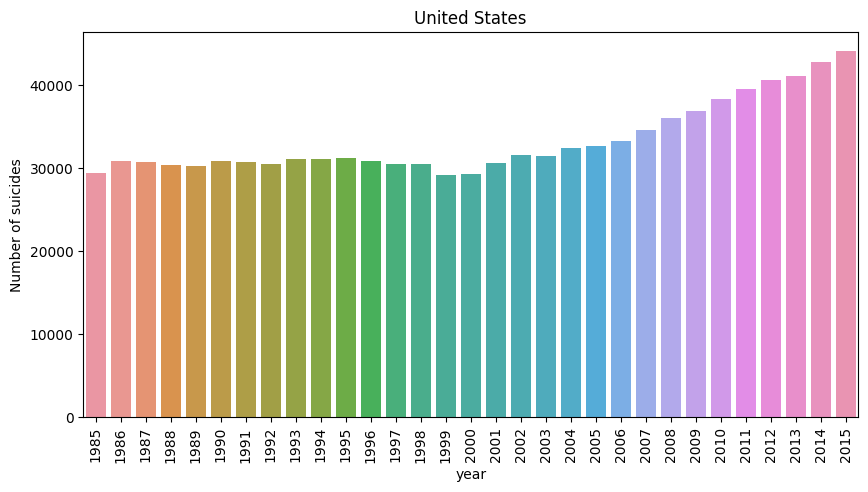

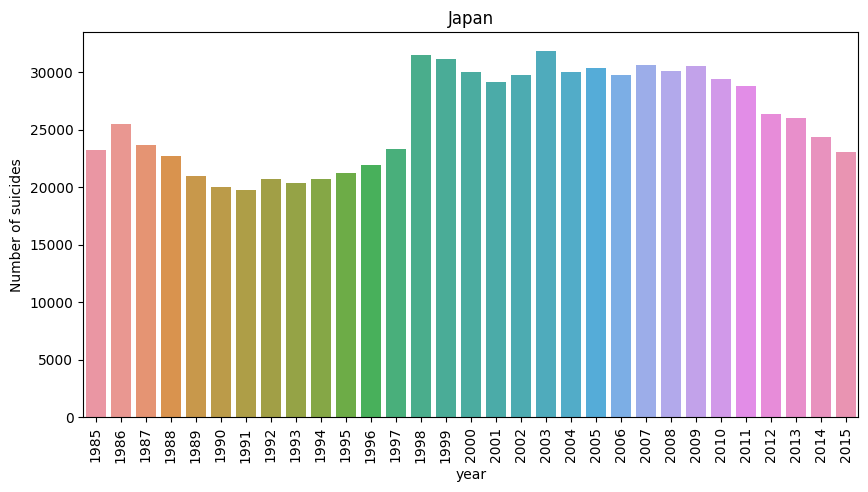

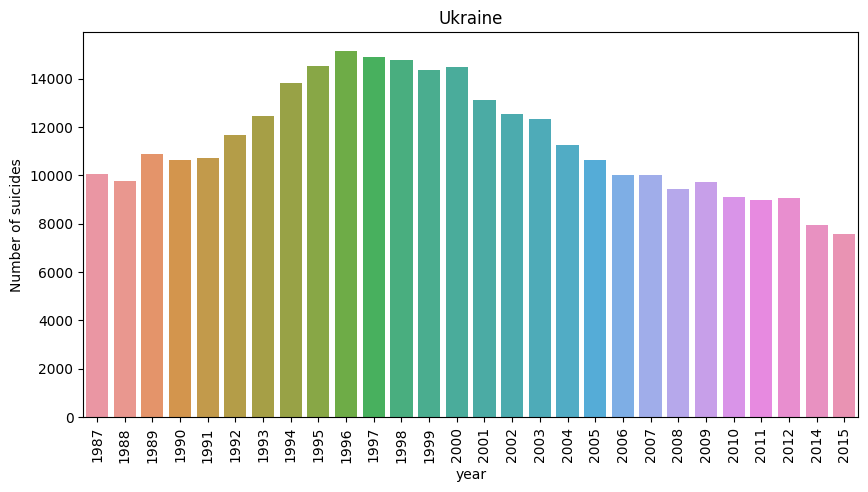

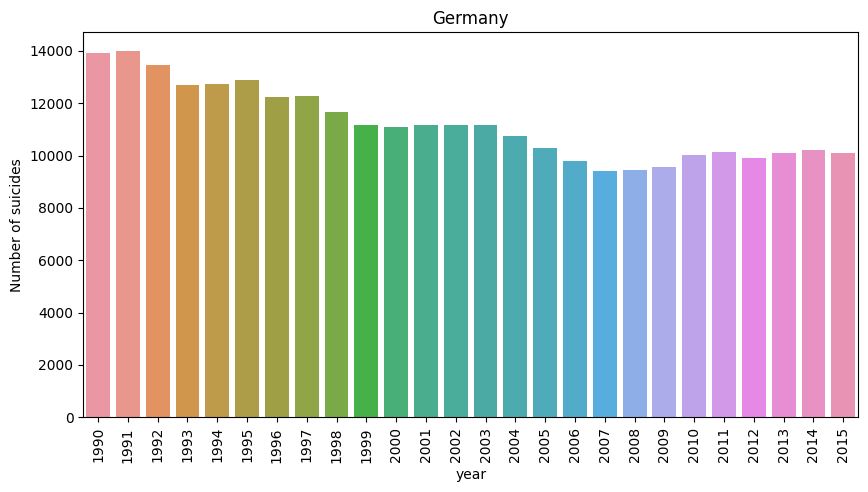

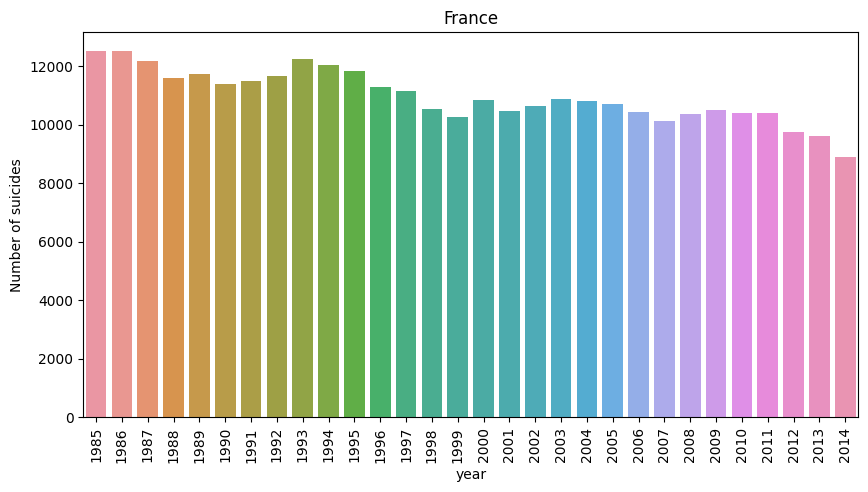

In [27]:
#plotting graphs for every country in the list obtained above with 'number of suicides vs the year'
for country in id_list:
    a=temp_df.xs(country,level='country')
    plt.figure(figsize=(10,5))
    sns.barplot(x=a.index,y=a["suicides_no"],ci=None)
    plt.ylabel("Number of suicides")
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,108108,8840,488859625,95.56,0.0,47753437533384,352016
15-24,108108,148611,569864937,1368.26,0.0,47753437533384,352016
25-34,108108,231187,595413982,2114.97,0.0,47753437533384,352016
35-54,108108,479140,1118486996,2378.83,0.0,47753437533384,352016
55-74,108108,267753,731053070,2321.51,0.0,47753437533384,352016
75+,108108,74211,187124010,3026.00,0.0,47753437533384,352016


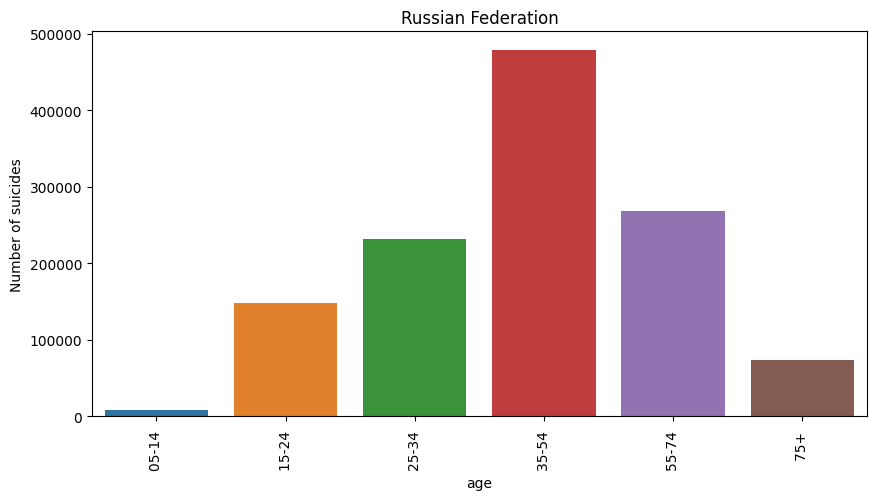

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,124000,8923,1205493232,45.47,17.832,651664156000000,2434716
15-24,124000,141679,1238381995,703.45,17.832,651664156000000,2434716
25-34,124000,182047,1277625343,878.69,17.832,651664156000000,2434716
35-54,124000,380917,2371577220,994.52,17.832,651664156000000,2434716
55-74,124000,224770,1460664960,988.47,17.832,651664156000000,2434716
75+,124000,95677,500284451,1530.37,17.832,651664156000000,2434716


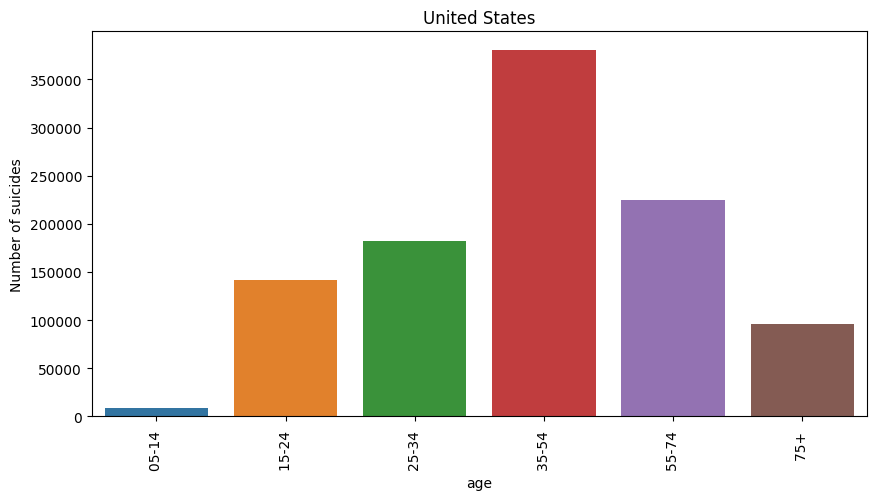

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,124000,2130,415444802,32.28,17.226,269031684742432,2256648
15-24,124000,52288,483860307,690.99,17.226,269031684742432,2256648
25-34,124000,94529,508206014,1146.80,17.226,269031684742432,2256648
35-54,124000,278679,1082002842,1600.46,17.226,269031684742432,2256648
55-74,124000,272705,889564037,1936.97,17.226,269031684742432,2256648
75+,124000,106571,301946842,2617.73,17.226,269031684742432,2256648


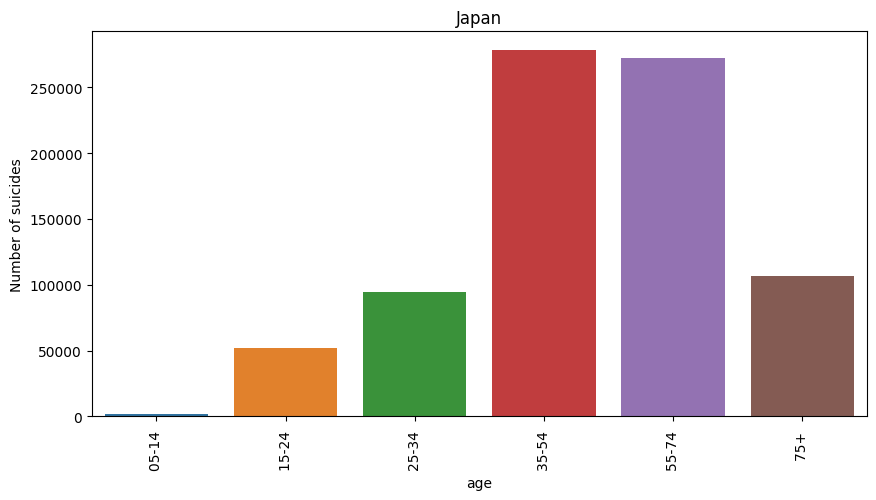

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,112032,1949,167518286,65.16,11.416,4697902123816,104582
15-24,112032,27509,193780298,784.45,11.416,4697902123816,104582
25-34,112032,49633,199435590,1398.59,11.416,4697902123816,104582
35-54,112032,124721,373996502,1933.55,11.416,4697902123816,104582
55-74,112032,90385,277266621,2081.43,11.416,4697902123816,104582
75+,112032,25753,74471887,2668.48,11.416,4697902123816,104582


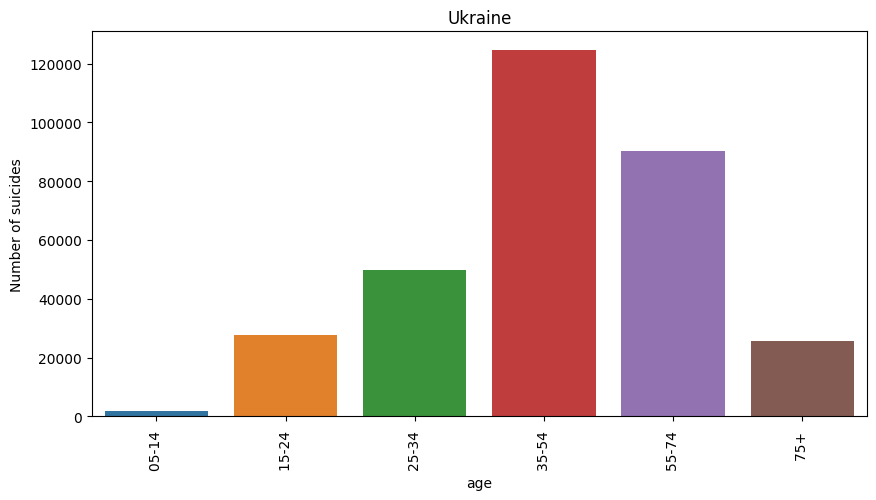

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,104130,832,215870617,19.51,15.872,142596116505738,1828540
15-24,104130,17902,244475391,373.89,15.872,142596116505738,1828540
25-34,104130,32947,299055318,549.19,15.872,142596116505738,1828540
35-54,104130,97833,622662380,815.98,15.872,142596116505738,1828540
55-74,104130,89191,474614746,1013.32,15.872,142596116505738,1828540
75+,104130,52557,168197160,2082.80,15.872,142596116505738,1828540


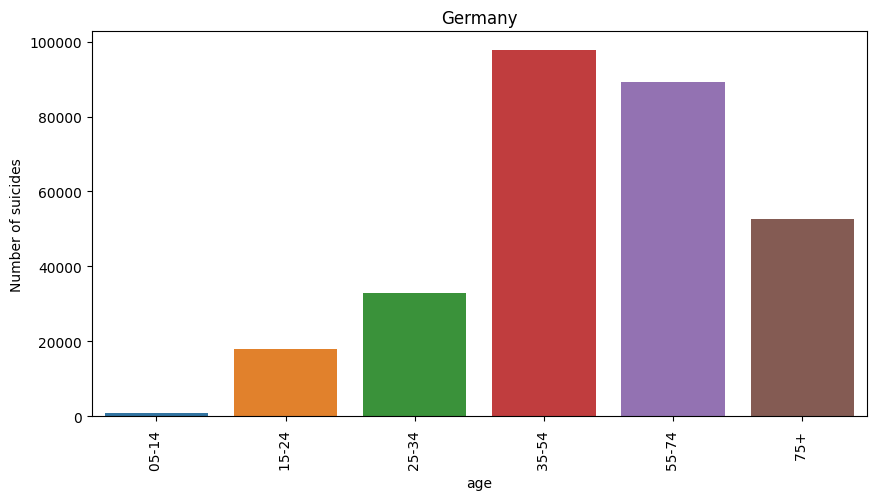

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
age,,,,,,,
05-14,119970,877,224509340,23.16,16.972,106871643947586,1888888
15-24,119970,19849,239909126,488.96,16.972,106871643947586,1888888
25-34,119970,42510,248127760,1020.98,16.972,106871643947586,1888888
35-54,119970,123510,481845681,1548.74,16.972,106871643947586,1888888
55-74,119970,86509,340072471,1592.85,16.972,106871643947586,1888888
75+,119970,55872,136292397,3128.56,16.972,106871643947586,1888888


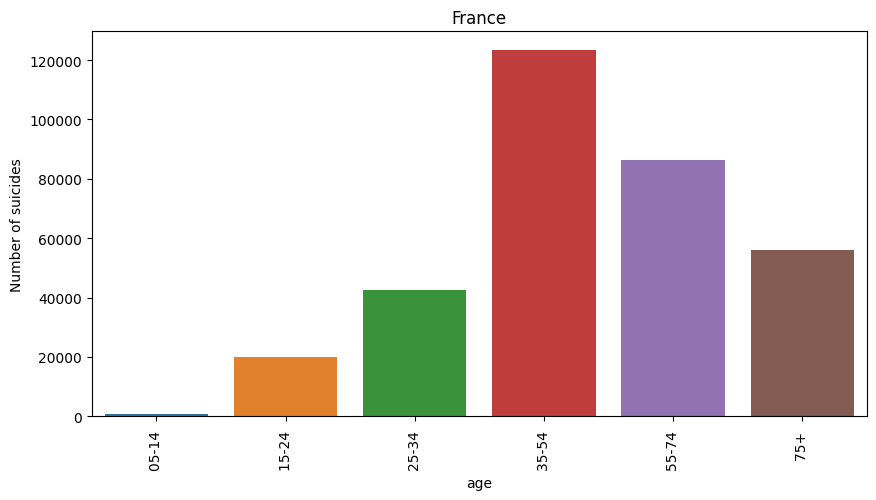

In [28]:
#grouping by country and age group this time.
#plotting the graphs with number of suicides vs the age group
temp_df2=copy_df.groupby(["country","age"]).sum()
for country in id_list:
    a=temp_df2.xs(country,level='country')
    display(a)
    plt.figure(figsize=(10,5))
    sns.barplot(x=a.index,y=a["suicides_no"],ci=None) 
    plt.ylabel("Number of suicides") #ci=None drops the uncertainity bar otherwise the uncertainity bar will show on the plot
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

3. Plot an appropriate set of graphs or charts that highlight the consistency of difference between males and females when it comes to suicide rates

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,,,,,,
1985,83584,495587031,5148.14,155.214,55482377117250,1754274
1986,86818,505443747,4905.79,0.000,66304815991434,2052318
1987,91836,535845937,5688.24,0.000,77884941137100,2822880
1988,88011,515314651,5614.05,0.000,87778845602238,2935254
1989,118883,595888144,6109.37,0.000,95809130823588,3034212


,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,,,,,,
1985,32479,513013055,1663.75,155.214,55482377117250,1754274
1986,33852,524465866,1674.05,0.000,66304815991434,2052318
1987,35006,559183789,1857.21,0.000,77884941137100,2822880
1988,33015,538779773,1859.08,0.000,87778845602238,2935254
1989,41361,629626203,1927.17,0.000,95809130823588,3034212


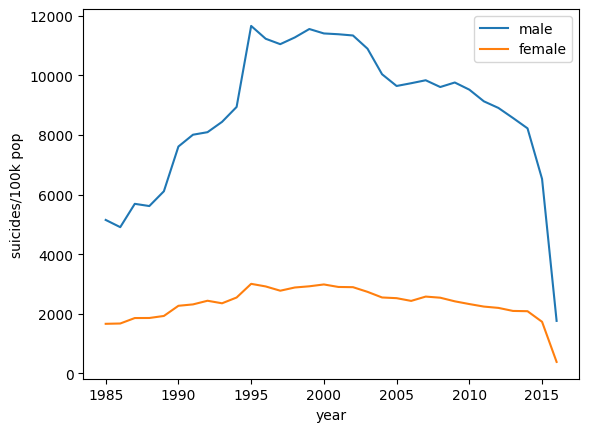

In [29]:
#f = plt.figure(figsize=(20,15))
# separating male and female data
df4 = copy_df.loc[copy_df['sex']=='male']
df5 = copy_df.loc[copy_df['sex']=='female']
# grouping by years taking means
df6 = df4.groupby(by='year').sum()
df7 = df5.groupby(by='year').sum()
display(df6.head())
display(df7.head())
#making a line plot
sns.lineplot(x=df6.index, y=df6['suicides/100k pop'],label='male')
sns.lineplot(x=df7.index, y=df7['suicides/100k pop'],label='female')
plt.show()

From this graph, it is evident that the number of suicides commited by males is much greater than females for any given year in the data set

4. Using an appropriate graph, show the worst year for each generation in the US

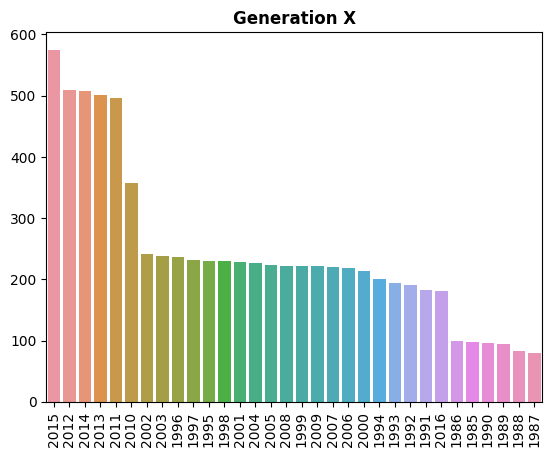

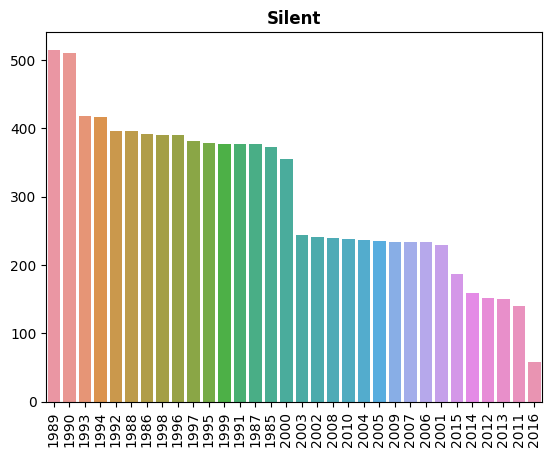

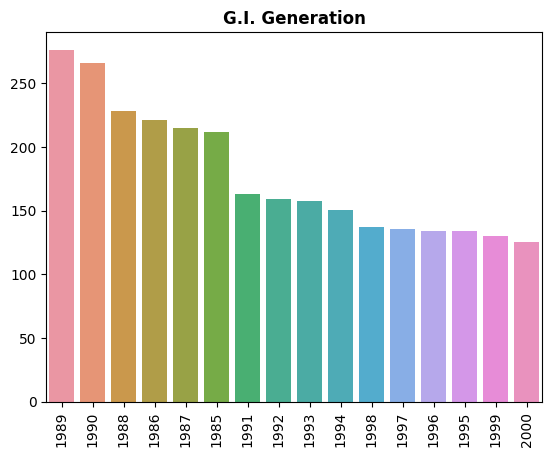

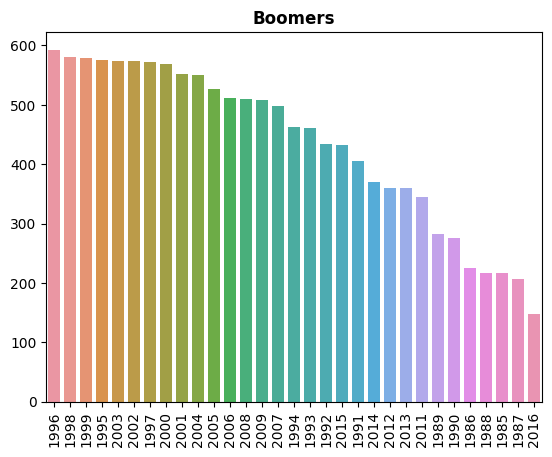

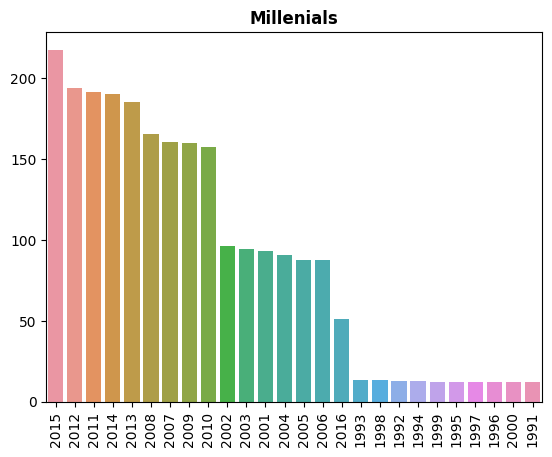

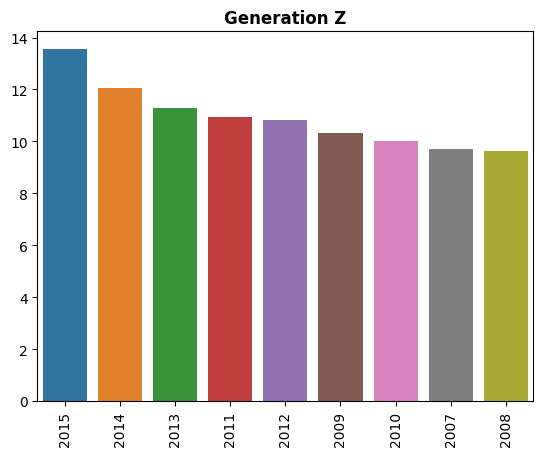

In [30]:
new_df = copy_df[["generation", "year", "suicides_no"]]
df5 = new_df.copy()
df5.columns = ['generation', 'year', 'suicides_no']
# convert the df5 to a compatible pivot table
df5 = df5.pivot_table(index='year', columns='generation', values='suicides_no')
# filling nan by 0
df5 = df5.fillna(0)
# text of column headers
columns_text = list(new_df['generation'].unique())
for i in range(6):
    plt.xticks(rotation=90)
    # getting a particular generation
    ser1 = df5[columns_text[i]].copy()
    ser1 = ser1.reset_index()
    # renaming column headers
    ser1.columns=['Year','Suicides']
    # Selecting only non negative suicide-years for a particular generation
    ser1 = ser1[ser1>0]
    # dropping rows with nan values
    ser1 = ser1.dropna()
    # sorting suicides in non decreasing order to show the worst year at the beginning of the plot
    ser1 = ser1.sort_values('Suicides',ascending=False).reset_index(drop=True)
    ax = sns.barplot(x='Year',y='Suicides',data=ser1,order = ser1['Year'])
    # removing x and y labels for a common label
    ax.set(xlabel='',ylabel='')
    plt.title(columns_text[i],weight='bold')
    plt.show()

It is evident from this graph that,
1. 2015 was the worst year for generation X as number of suicides committed is maximum
2. 2015 was the worst year for generation Z
3. 2015 was the worst year for millenials
4. 1996 was the worst year for boomers
5. 1989 was the worst for Silent and G.I. generation

5. Plot a bihistogram for a few specific countries (for a year, say 2000) for male and female populations by age ranges to highlight some differences in sex ratios between countries

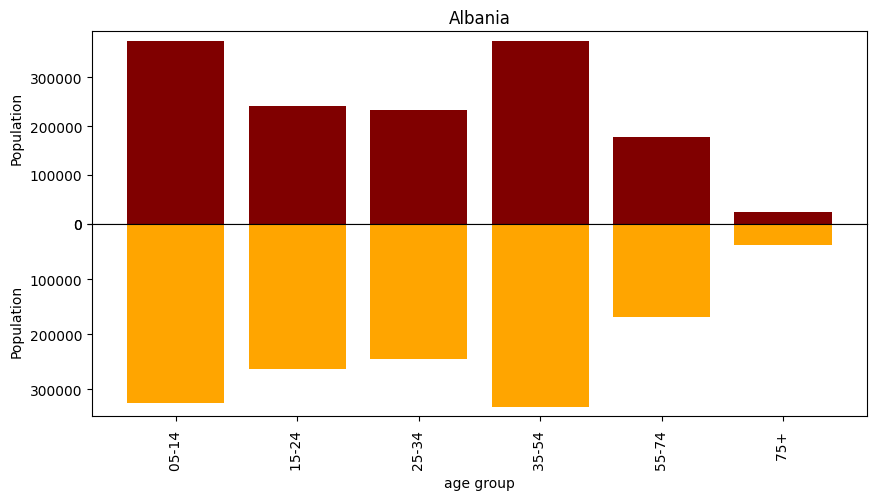

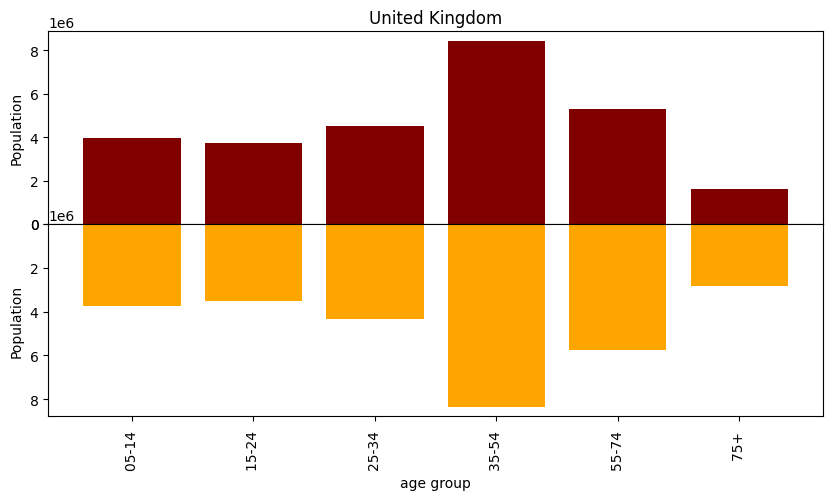

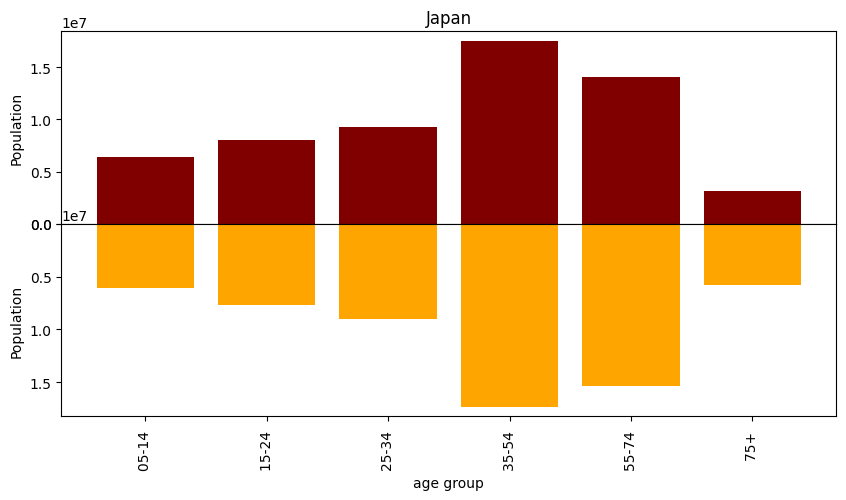

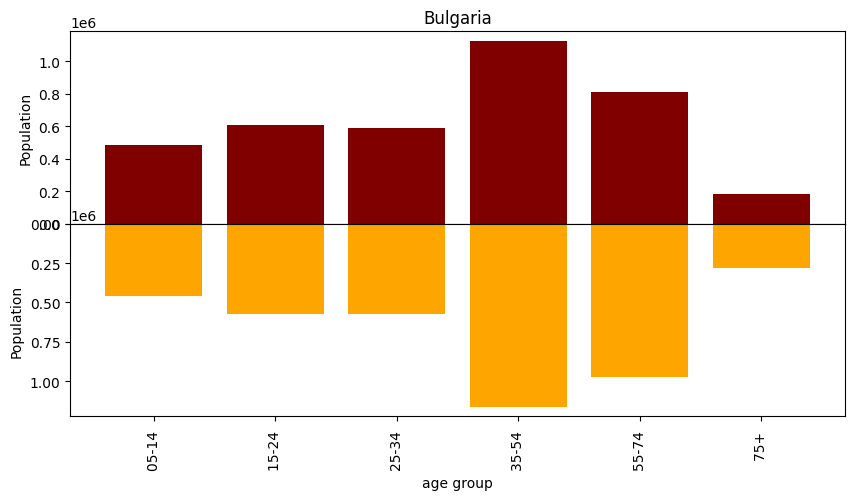

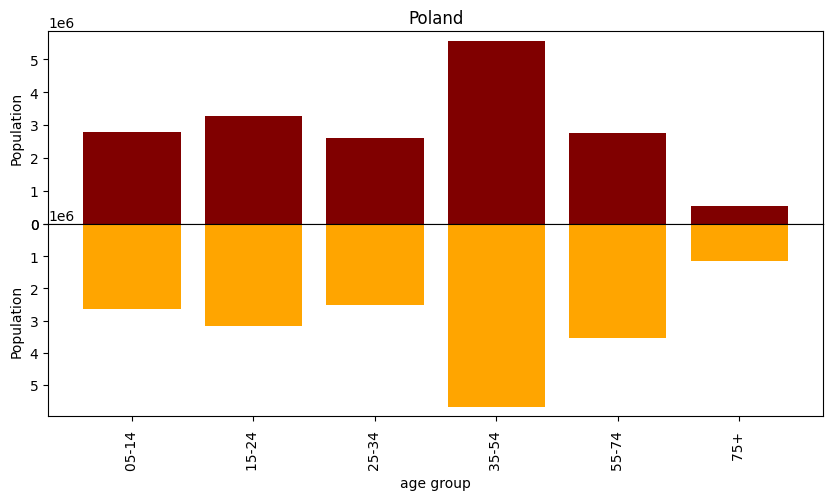

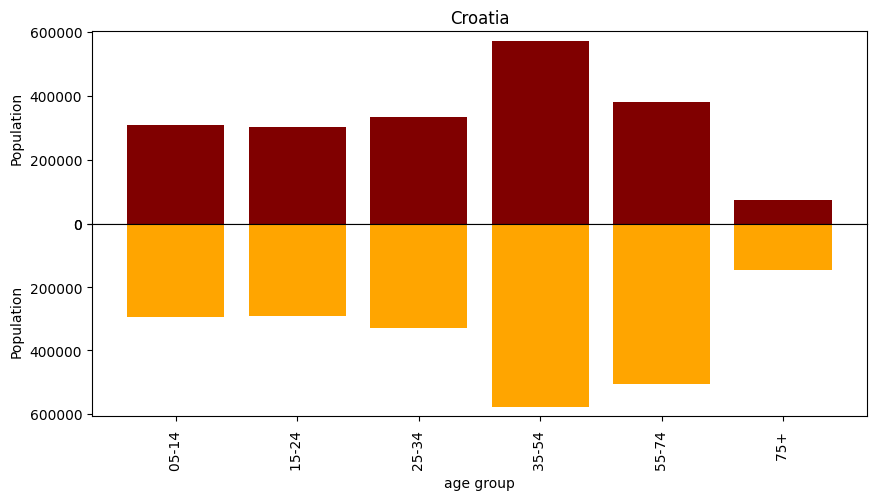

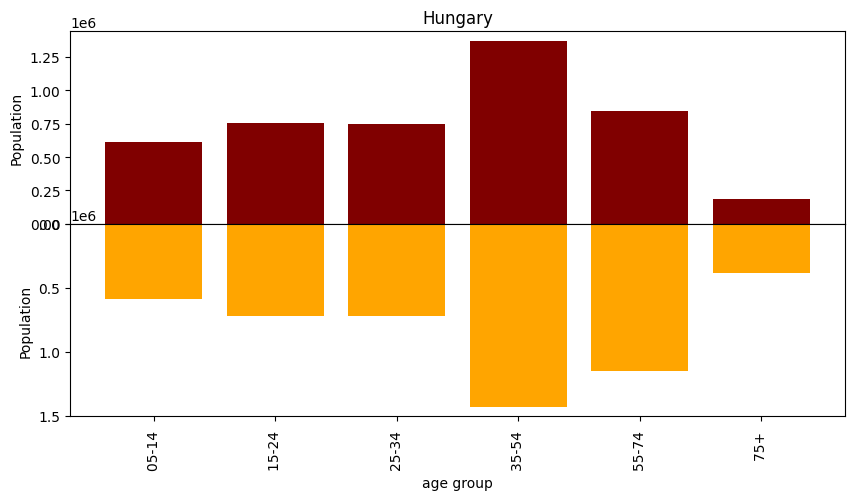

In [31]:
df2 = df.groupby(['year','country','sex','age']).sum()
# finding an index from multiindex using df.xs
df3 = df2.xs(2000,level='year')
# converting multiindex to normal index
df3 = df3.reset_index()
# selecting some countries for visualization
countries = ['Albania','United Kingdom','Japan','Bulgaria','Poland',"Croatia","Hungary"]
for country in countries:
    #selecting countries one by one
    df4 = df3.loc[df3['country']==country]
    #Selecting population and age columns of male and female data
    df_male = df4.loc[df4['sex']=='male'][['population','age']]
    df_female = df4.loc[df4['sex']=='female'][['population','age']]
    # merging male female data by age data to plot age-wise
    df_merge = pd.merge(df_male, df_female, on='age')
    df_male.reset_index(drop=True,inplace=True)
    df_female.reset_index(drop=True,inplace=True)
    df_merge = df_merge[['age','population_x','population_y']]
    # For bihistogram plot creating subplot with 2 rows and 1 column
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
    # seelcting an axis, color and data for each plot
    for ax, column, color, invert in zip(axes.ravel(), ['population_x','population_y'], ['maroon', 'orange'],  [False,True]):
        #maroon is for males and yellow is for females
        ax.bar(df_merge['age'],df_merge[column],  color=color)
        plt.xticks(rotation=90)
        ax.set(xlabel='age group',ylabel='Population')
        # inverting if counter invert is true(alternative)
        if invert:
            ax.invert_yaxis()
        # alternatively plotting title as we need one title for bihist
        else :
            ax.set_title(country)
    # To stick bihistograms together making hspace between them=0
    plt.subplots_adjust(hspace=0)

From this plot, it is evident that:
1. In Albania, The number of suicides between the age of 5-14 is surprisingly and ratio of mle to female suicides is almost 1. In the later years, female suicides are a bit higher
2. In United Kingdom, number of female suicides is slightly higher as compared to males
3. In Japan, in the later years, the number of female suicides is higher than male suicides
4. In Bulgaria, the number of male and female suicides is same throughout

In [32]:
df_new=n_df.copy()
df_new=df_new.dropna(subset=["HDI for year"])
#getting a random sample from the dataframe
sample_df=df_new.sample(n=100)
display(sample_df.head(10))
sample_df=sample_df.sort_index()
#printing the sorted sample dataframe
display(sample_df.head(10))


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16156,Malta,2013,female,55-74 years,0,52903,0.00,Malta2013,0.837,"10,145,114,180",25191,Boomers
26663,United Kingdom,2000,female,25-34 years,167,4332330,3.85,United Kingdom2000,0.865,"1,647,951,278,560",29358,Generation X
22155,Serbia,2013,male,15-24 years,29,419407,6.91,Serbia2013,0.771,"45,519,650,911",6662,Millenials
24928,Switzerland,2011,male,5-14 years,2,409701,0.49,Switzerland2011,0.925,"699,579,638,638",93053,Generation Z
24915,Switzerland,2010,female,15-24 years,15,455057,3.30,Switzerland2010,0.924,"583,782,977,866",78474,Millenials
8475,Estonia,2005,male,75+ years,13,24740,52.55,Estonia2005,0.824,"14,006,088,297",10870,Silent
2537,Bahamas,2005,male,15-24 years,0,28762,0.00,Bahamas2005,0.780,"9,836,200,000",32596,Millenials
24688,Sweden,2013,female,15-24 years,48,595101,8.07,Sweden2013,0.905,"578,742,001,488",64133,Millenials
17374,Netherlands,2010,female,25-34 years,53,997025,5.32,Netherlands2010,0.909,"836,389,937,229",53302,Generation X
1488,Australia,1990,male,15-24 years,374,1405900,26.60,Australia1990,0.865,"310,838,014,621",19665,Generation X


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
259,Albania,2010,female,35-54 years,12,394593,3.04,Albania2010,0.722,"11,926,953,259",4359,Generation X
1230,Armenia,2014,male,15-24 years,3,230760,1.30,Armenia2014,0.733,"11,609,512,940",4142,Millenials
1488,Australia,1990,male,15-24 years,374,1405900,26.60,Australia1990,0.865,"310,838,014,621",19665,Generation X
1548,Australia,1995,male,35-54 years,587,2507400,23.41,Australia1995,0.882,"367,216,364,716",21902,Boomers
1748,Australia,2012,female,5-14 years,10,1368580,0.73,Australia2012,0.932,"1,543,411,012,580",72669,Generation Z
1797,Austria,1985,female,5-14 years,2,453859,0.44,Austria1985,0.764,"69,386,774,475",9759,Generation X
1846,Austria,1990,male,75+ years,186,165206,112.59,Austria1990,0.794,"166,463,386,663",23020,G.I. Generation
2231,Azerbaijan,1995,male,15-24 years,9,663600,1.36,Azerbaijan1995,0.609,"3,052,467,522",462,Generation X
2537,Bahamas,2005,male,15-24 years,0,28762,0.00,Bahamas2005,0.780,"9,836,200,000",32596,Millenials
3167,Barbados,2012,female,5-14 years,0,18436,0.00,Barbados2012,0.793,"4,656,350,000",17620,Generation Z


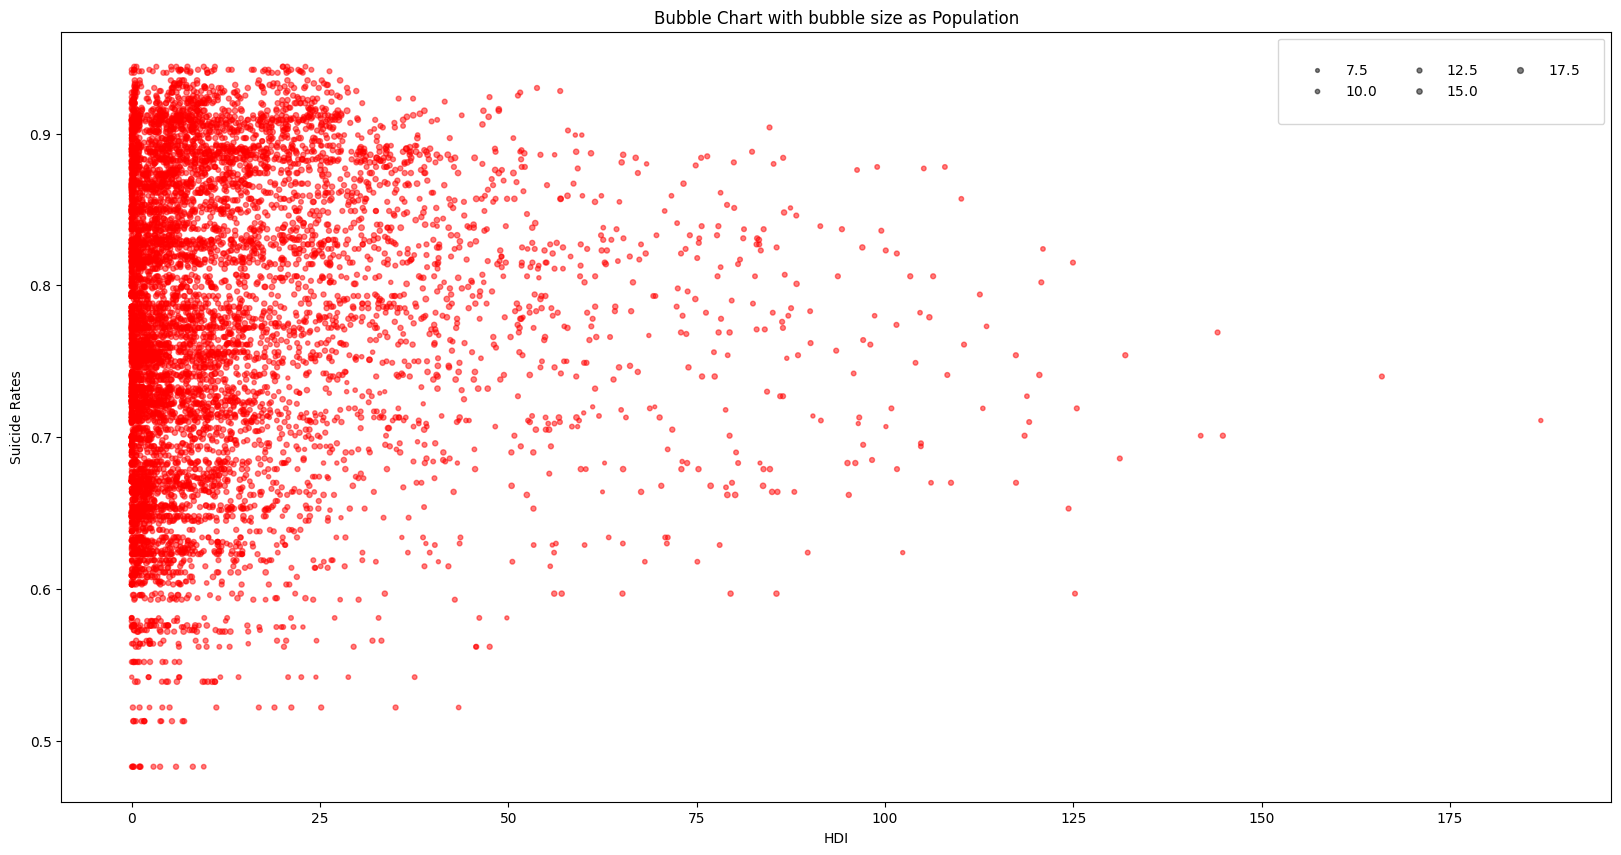

In [33]:
y=df_new["HDI for year"]
x=np.log(df_new["population"])    #taking the log transform
z=df_new["suicides/100k pop"]     #in this plot, the size of the circles is representative of the population and we have suicide rates on the y axis and HDi on the x axis.
plt.figure(figsize=(20,10))
ax = plt.scatter(z,y,s = x, c="red",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True,handlelength=2, borderpad = 1.8,handletextpad=1)
plt.xlabel('HDI')
plt.ylabel('Suicide Rates')
plt.title('Bubble Chart with bubble size as Population')
plt.show()

References
1. geeksforgeeks
2. stackoverflow